### This Notebook is for testing purposes only. TESLA stock prediction model is taken from the following link

https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f

In [79]:
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping


df=pd.read_csv("TSLA.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [80]:
# split the data into training and test sets

training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [6]:
df.iloc[:800, 1:2]

,Open
0,52.444000
1,52.450001
2,52.419998
3,53.348000
4,52.844002
...,...
795,57.009998
796,56.959999
797,52.020000
798,54.652000


In [7]:
df.iloc[800:, 1:2]

,Open
800,56.287998
801,57.604000
802,57.751999
803,58.007999
804,59.338001
...,...
1254,244.296005
1255,255.337997
1256,281.002014
1257,281.000000


In [81]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [92]:
training_set
training_set_scaled
training_set_scaled[60-60:60, ]

IndexError: index 1 is out of bounds for axis 1 with size 1

In [17]:
X_train.shape[1]

60

In [18]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Train on 740 samples
Epoch 1/100
740/740 [==============================] - 20s 27ms/sample - loss: 0.0680
Epoch 2/100
740/740 [==============================] - 11s 14ms/sample - loss: 0.0159
Epoch 3/100
740/740 [==============================] - 11s 15ms/sample - loss: 0.0121
Epoch 4/100
740/740 [==============================] - 12s 16ms/sample - loss: 0.0124
Epoch 5/100
740/740 [==============================] - 12s 16ms/sample - loss: 0.0129
Epoch 6/100
740/740 [==============================] - 11s 15ms/sample - loss: 0.0119
Epoch 7/100
740/740 [==============================] - 11s 15ms/sample - loss: 0.0120
Epoch 8/100
740/740 [==============================] - 12s 16ms/sample - loss: 0.0108
Epoch 9/100
740/740 [==============================] - 12s 16ms/sample - loss: 0.0108
Epoch 10/100
740/740 [==============================] - 12s 16ms/sample - loss: 0.0103
Epoch 11/100
740/740 [==============================] - 12s 16ms/sample - loss: 0.0100
Epoch 12/100
740/740 [=========

In [19]:
model.save('Saved_model/Trained_model.h5')

In [20]:
model_loaded = tf.keras.models.load_model('Saved_model/Trained_model.h5')

In [41]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
dummy = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = dummy.reshape(-1,1)
inputs_transformed = sc.transform(inputs)

X_test = []

for i in range(60, 519):
    X_test.append(inputs_transformed[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [22]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [26]:
predicted_stock_price = model_loaded.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

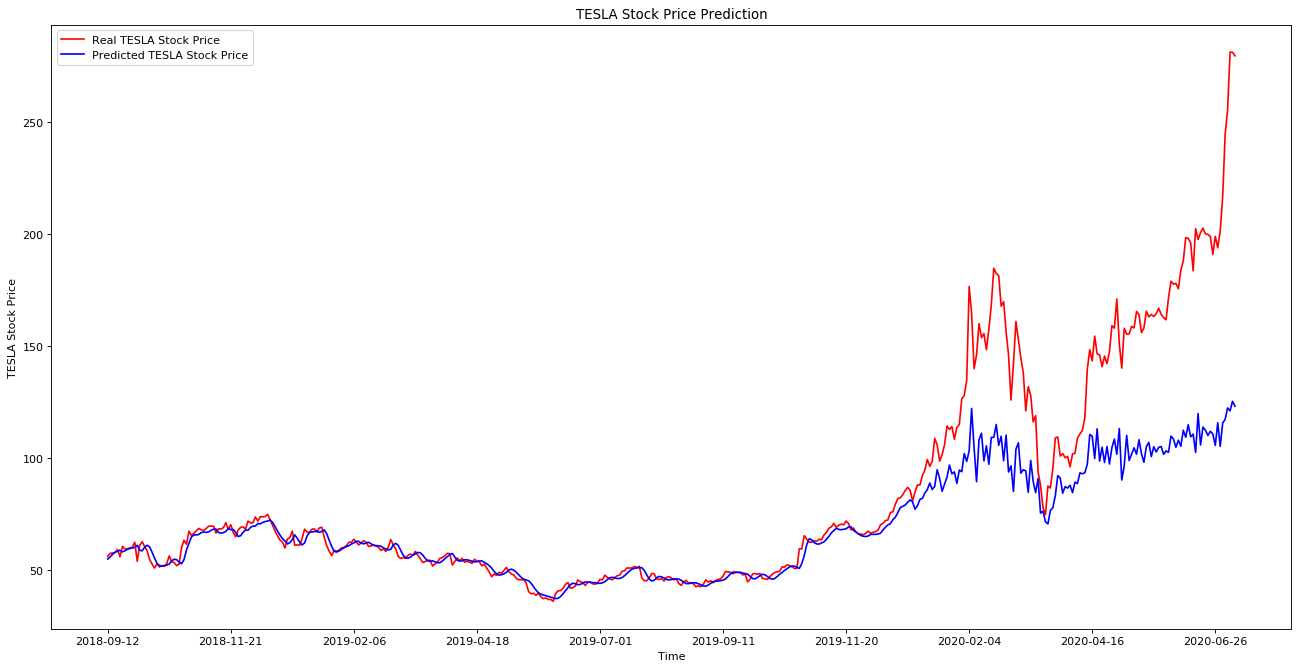

In [27]:
from matplotlib.pyplot import figure

figure(figsize=(20, 10), dpi=80)

# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [65]:
# calculate root mean squared error
testScoreRMSE = np.sqrt(mean_squared_error(dataset_test.values, predicted_stock_price[:,0].reshape(-1,1)))
print('Test Score: %.2f RMSE' % (testScoreRMSE))

testScoreMAE = mean_absolute_error(dataset_test.values, predicted_stock_price[:,0].reshape(-1,1))
print('Test Score: %.2f MSE' % (testScoreMAE))

# dataset_test.values[:250]
# predicted_stock_price[:,0].reshape(-1,1)

Test Score: 31.41 RMSE
Test Score: 15.33 MSE


## Trial 2:

### Now I will attempt to use multiple features, instead of just closing price. Intiutivally, stock trading volume should have an impact on the prediction

In [165]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [166]:
# split the data into training and test sets

# df.iloc[:800, [4,6]]



training_set = df.iloc[:800, [4,6]].values
test_set = df.iloc[800:, [4,6]].values

training_set

array([[5.1830002e+01, 1.3054500e+07],
       [5.2431999e+01, 1.4801500e+07],
       [5.3130001e+01, 9.5380000e+06],
       ...,
       [5.2647999e+01, 1.1245950e+08],
       [5.7099998e+01, 7.1417500e+07],
       [5.5888000e+01, 4.5850000e+07]])

In [167]:
# scaler = StandardScaler()

# training_set_scaled = scaler.fit_transform(training_set)

# training_set_unscaled = scaler.inverse_transform(training_set_scaled)

# training_set_unscaled

# test = np.zeros((len(training_set_scaled),2))
# test[:,0] = training_set_scaled[:,0]

# prediction = scaler.inverse_transform(test)
# prediction[:,0]
# # # Get something which has as many features as dataset
# predicted_stock_price_extended = np.zeros((len(predicted_stock_price),2))
# # predicted_stock_price_extended[:,1]
# # predicted_stock_price
# # # # Put the predictions there
# predicted_stock_price_extended[:,1] = predicted_stock_price[:,0]
# # predicted_stock_price_extended
# # # # Inverse transform it and select the 3rd column.
# predicted_stock_price = scaler.inverse_transform(predicted_stock_price_extended)[:,1]

In [168]:
scaler = StandardScaler()

training_set_scaled = scaler.fit_transform(training_set)

X_train = []
y_train = []

for i in range(60, 800):
    
    X_train.append(training_set_scaled[i-60:i, 0:2])
    y_train.append(training_set_scaled[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))


In [169]:
# training_set_scaled[60-60:60, 0:2]
# training_set_scaled[1, 1]
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape[1]

60

In [170]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 2)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Train on 740 samples
Epoch 1/100
740/740 [==============================] - 19s 26ms/sample - loss: 0.3282
Epoch 2/100
740/740 [==============================] - 10s 13ms/sample - loss: 0.1664
Epoch 3/100
740/740 [==============================] - 10s 13ms/sample - loss: 0.1387
Epoch 4/100
740/740 [==============================] - 10s 13ms/sample - loss: 0.1264
Epoch 5/100
740/740 [==============================] - 10s 14ms/sample - loss: 0.1132
Epoch 6/100
740/740 [==============================] - 10s 14ms/sample - loss: 0.1086
Epoch 7/100
740/740 [==============================] - 10s 14ms/sample - loss: 0.0940
Epoch 8/100
740/740 [==============================] - 11s 15ms/sample - loss: 0.0973
Epoch 9/100
740/740 [==============================] - 10s 14ms/sample - loss: 0.0849
Epoch 10/100
740/740 [==============================] - 10s 14ms/sample - loss: 0.0815
Epoch 11/100
740/740 [==============================] - 10s 13ms/sample - loss: 0.0698
Epoch 12/100
740/740 [=========

In [171]:
dataset_train = df.iloc[:800, 4:6]
dataset_test = df.iloc[800:, 4:6]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
dummy = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = dummy.reshape(-1,2)
inputs_transformed = scaler.transform(inputs)

X_test = []

for i in range(60, 519):
    X_test.append(inputs_transformed[i-60:i, 0:2])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))
print(X_test.shape)

(459, 60, 2)


In [172]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price
# Get something which has as many features as dataset
predicted_stock_price_extended = np.zeros((len(predicted_stock_price),2))
# predicted_stock_price_extended[:,1]
# predicted_stock_price
# # # Put the predictions there
predicted_stock_price_extended[:,0] = predicted_stock_price[:,0]
# predicted_stock_price_extended
# # # Inverse transform it and select the 3rd column.
predicted_stock_price = scaler.inverse_transform(predicted_stock_price_extended)[:,0]

predicted_stock_price

array([59.11299538, 59.14643097, 59.28530462, 59.46245949, 59.59817376,
       59.5476251 , 59.45319925, 59.36360302, 59.27709195, 59.18074868,
       59.07682903, 59.04303256, 59.04814544, 58.619047  , 58.26038904,
       58.0750106 , 57.9467801 , 57.68182113, 57.07231006, 56.10445646,
       55.17330898, 54.41921066, 53.81408476, 53.40609052, 53.16208119,
       53.1828546 , 53.31676295, 53.33645288, 53.14550374, 52.7980619 ,
       52.71333249, 52.8619253 , 53.3243372 , 54.05526097, 54.9044276 ,
       55.63999582, 56.18953951, 56.63844277, 57.0327862 , 57.32641957,
       57.53022248, 57.75815139, 58.07405394, 58.44840869, 58.68302335,
       58.84687207, 59.08321792, 59.46858487, 60.0069732 , 60.59658837,
       61.10383983, 61.42193726, 61.48397543, 61.63114312, 61.91999929,
       62.33065555, 62.70987329, 63.09900426, 63.56302401, 64.02793779,
       64.46578511, 64.78121205, 65.04240938, 65.27670709, 65.47624756,
       65.72153159, 65.88411417, 65.80485877, 65.4704463 , 65.02

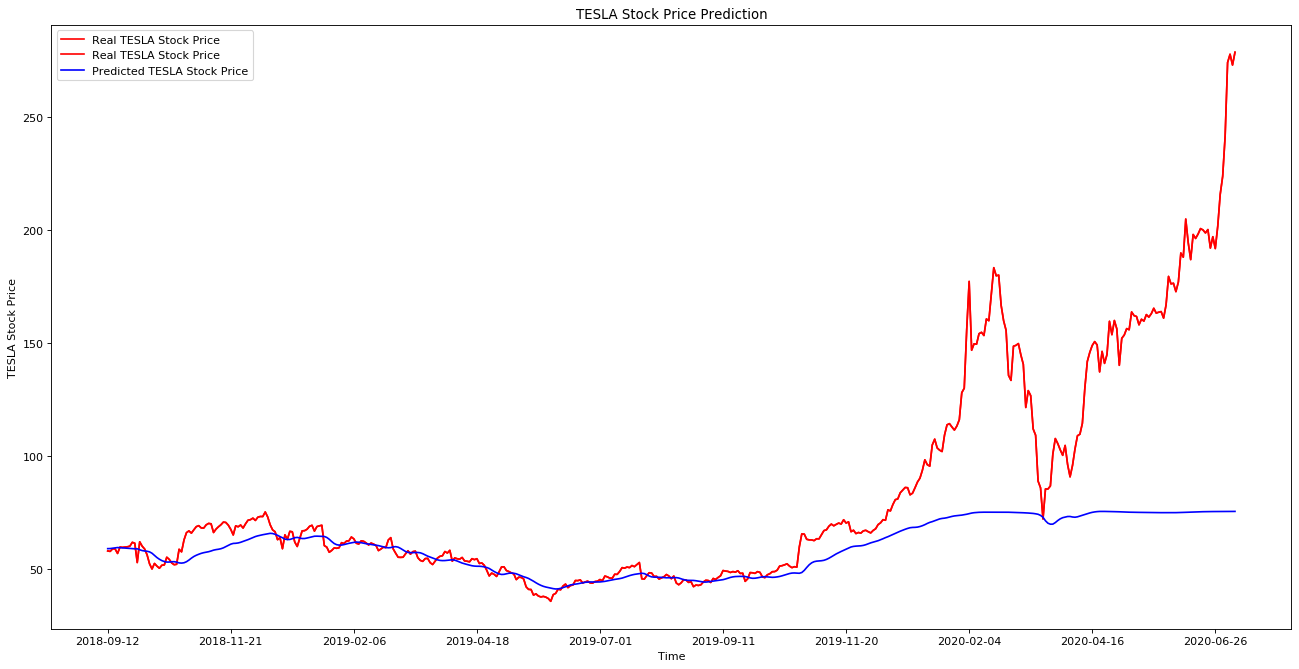

In [173]:
from matplotlib.pyplot import figure



figure(figsize=(20, 10), dpi=80)

# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [174]:
# calculate root mean squared error
testScoreRMSE = np.sqrt(mean_squared_error(dataset_test.values, predicted_stock_price[:,0].reshape(-1,1)))
print('Test Score: %.2f RMSE' % (testScoreRMSE))

testScoreMAE = mean_absolute_error(dataset_test.values, predicted_stock_price[:,0].reshape(-1,1))
print('Test Score: %.2f MSE' % (testScoreMAE))


IndexError: too many indices for array